# Evaluation of Single-Context Features

In [40]:
dataset = 'community-prediction-youtube-n'
layer_name = 'LikesLayer' 

In [41]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/single_context/{layer_name}.csv', index_col=0)

In [42]:
df.columns

Index(['cluster_size', 'cluster_variance', 'cluster_density',
       'cluster_import1', 'cluster_import2', 'cluster_area',
       'cluster_center_distance', 'time_f1', 'time_f2', 'cluster_size.1',
       'cluster_variance.1', 'cluster_density.1', 'cluster_import1.1',
       'cluster_import2.1', 'cluster_area.1', 'cluster_center_distance.1',
       'time_f1.1', 'time_f2.1', 'cluster_size.2', 'cluster_variance.2',
       'cluster_density.2', 'cluster_import1.2', 'cluster_import2.2',
       'cluster_area.2', 'cluster_center_distance.2', 'time_f1.2', 'time_f2.2',
       'evolution_label'],
      dtype='object')

In [43]:
COLUMNS = []
for i in range(3):
    COLUMNS += [h+f'.{i+1}' for h in 
    ['size', 'sd', 'scarcity', 'popularity', 'diversity', 'magnitude', 'temp_center_distance', 'time_f1', 'time_f2']
    ]

COLUMNS += ['evolution_label']

In [44]:
COLUMNS

['size.1',
 'sd.1',
 'scarcity.1',
 'popularity.1',
 'diversity.1',
 'magnitude.1',
 'temp_center_distance.1',
 'time_f1.1',
 'time_f2.1',
 'size.2',
 'sd.2',
 'scarcity.2',
 'popularity.2',
 'diversity.2',
 'magnitude.2',
 'temp_center_distance.2',
 'time_f1.2',
 'time_f2.2',
 'size.3',
 'sd.3',
 'scarcity.3',
 'popularity.3',
 'diversity.3',
 'magnitude.3',
 'temp_center_distance.3',
 'time_f1.3',
 'time_f2.3',
 'evolution_label']

In [45]:
df.columns = COLUMNS

In [46]:
COLUMNS_reordered = []
for i in range(3):
    COLUMNS_reordered += [h+f'.{i+1}' for h in 
    ['size', 'sd', 'magnitude', 'scarcity', 'temp_center_distance', 'popularity', 'diversity', 'time_f1', 'time_f2']
    ]

COLUMNS_reordered += ['evolution_label']

In [47]:
df = df[COLUMNS_reordered]

In [48]:
df.columns

Index(['size.1', 'sd.1', 'magnitude.1', 'scarcity.1', 'temp_center_distance.1',
       'popularity.1', 'diversity.1', 'time_f1.1', 'time_f2.1', 'size.2',
       'sd.2', 'magnitude.2', 'scarcity.2', 'temp_center_distance.2',
       'popularity.2', 'diversity.2', 'time_f1.2', 'time_f2.2', 'size.3',
       'sd.3', 'magnitude.3', 'scarcity.3', 'temp_center_distance.3',
       'popularity.3', 'diversity.3', 'time_f1.3', 'time_f2.3',
       'evolution_label'],
      dtype='object')

# Evaluation of Cross-Context Features

In [2]:
dataset = 'community-prediction-youtube-n'
layer_name = 'LikesLayer' 
reference_layer_name = 'ViewsLayer'

In [3]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv(f'data/{dataset}/ml_input/cross_context/{layer_name}_{reference_layer_name}.csv', index_col=0)

In [4]:
df.columns

Index(['n_nodes', 'n_clusters', 'entropy', 'sizes_min', 'sizes_max',
       'sizes_avg', 'sizes_sum', 'relative_sizes_min', 'relative_sizes_max',
       'relative_sizes_avg', 'relative_sizes_sum', 'center_dist_min',
       'center_dist_max', 'center_dist_avg', 'center_dist_sum', 'time_f1',
       'time_f2', 'n_nodes.1', 'n_clusters.1', 'entropy.1', 'sizes_min.1',
       'sizes_max.1', 'sizes_avg.1', 'sizes_sum.1', 'relative_sizes_min.1',
       'relative_sizes_max.1', 'relative_sizes_avg.1', 'relative_sizes_sum.1',
       'center_dist_min.1', 'center_dist_max.1', 'center_dist_avg.1',
       'center_dist_sum.1', 'time_f1.1', 'time_f2.1', 'cluster_id',
       'evolution_label'],
      dtype='object')

## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)[:,:-1] # all except y

In [50]:
y = df[df.columns[-1]]

In [ ]:
pd.DataFrame(data=X, columns=df.columns[:-1]).head(2)

In [30]:
df.head(2)

,size.1,sd.1,scarcity.1,popularity.1,diversity.1,magnitude.1,temp_center_distance.1,time_f1.1,time_f2.1,size.2,...,size.3,sd.3,scarcity.3,popularity.3,diversity.3,magnitude.3,temp_center_distance.3,time_f1.3,time_f2.3,evolution_label
0,1.0,0.0,0.0,0.000091,0.000183,0.0,2.2,0.568065,0.822984,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.748511,0.663123,-1.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.992709,0.120537,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992709,-0.120537,-1.0


In [ ]:
y.value_counts()

## Principal Components

In [51]:
from sklearn.decomposition import PCA

n_components = 10

pca = PCA(n_components=n_components)
# compute scores in Xp
Xp = pca.fit_transform(X)
# get loadings and the ammount of variance explained by each component 
c, v, r = pca.components_, pca.explained_variance_, pca.explained_variance_ratio_

loadings = pd.DataFrame(data=c, columns=df.columns[:-1], index=range(n_components))

In [11]:
pd.DataFrame(data=Xp, 
             columns=[f'Z{i+1}' for i in range(n_components)])

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
0,-0.168816,-0.053058,0.267579,-0.035999,-0.012545,1.433794,-0.396463,1.763088,0.630923,0.034910
1,-0.884871,0.169540,-1.796813,0.008273,0.001021,0.891177,0.856891,0.058710,-0.022858,0.047587
2,0.443359,0.039854,-0.772903,-0.036451,0.016829,-0.911476,-1.344437,1.218976,-1.105190,-0.080137
3,-0.854960,-0.288239,2.838445,-0.010156,0.000727,0.118628,0.865400,0.048275,-0.023601,0.060426
4,-0.877890,0.075037,-0.786473,0.006765,0.001849,-0.171029,0.879920,0.040947,-0.027198,0.047959
...,...,...,...,...,...,...,...,...,...,...
565819,1.536324,0.104252,-1.823928,-0.047624,0.005387,0.811525,-1.117300,2.050897,-0.803641,-0.018232
565820,-0.233108,0.199060,-2.184184,0.009082,0.028105,-0.240721,-0.197911,-0.329895,-1.678571,-0.045953
565821,-0.888695,0.206657,-2.149995,0.007444,0.001224,0.092125,0.873035,0.044949,-0.022172,0.039347
565822,1.529951,0.159364,-2.184140,-0.059007,0.003080,-0.637061,-1.091591,2.007867,-0.825255,-0.014639


In [13]:
loadings

,n_nodes,n_clusters,entropy,sizes_min,sizes_max,sizes_avg,sizes_sum,relative_sizes_min,relative_sizes_max,relative_sizes_avg,...,relative_sizes_max.1,relative_sizes_avg.1,relative_sizes_sum.1,center_dist_min.1,center_dist_max.1,center_dist_avg.1,center_dist_sum.1,time_f1.1,time_f2.1,cluster_id
0,2.107229e-01,1.624259e-01,1.349457e-01,0.000000e+00,1.786279e-01,1.987807e-01,2.107229e-01,-1.686170e-01,-1.496100e-02,-1.396512e-01,...,-5.905928e-02,-1.184052e-01,-2.997664e-03,0.0,2.713979e-01,2.728723e-01,2.756611e-01,1.484012e-01,-1.781569e-01,4.011439e-18
1,-2.629190e-02,-9.810024e-02,-1.041918e-01,-5.551115e-17,1.231580e-01,1.562278e-01,-2.629190e-02,4.391461e-02,1.017254e-01,8.082347e-02,...,3.391487e-01,3.297458e-01,-9.597052e-03,0.0,1.373610e-02,6.285928e-02,2.714371e-02,1.413996e-01,-2.563637e-01,8.322137e-18
2,-2.893868e-01,-3.220571e-01,-3.429238e-01,0.000000e+00,1.439860e-01,-5.099520e-02,-2.893868e-01,3.348215e-01,3.606486e-01,3.491103e-01,...,-6.383672e-02,-1.342212e-01,-3.584073e-02,0.0,5.251349e-02,7.858141e-02,8.668031e-02,1.370507e-01,-8.356492e-02,5.961371e-18
3,6.465165e-02,-7.996862e-02,-8.359538e-02,2.220446e-16,1.344173e-01,3.783824e-01,6.465165e-02,-4.672634e-02,4.331107e-02,3.030038e-02,...,1.098242e-02,-2.751091e-02,3.262464e-01,0.0,-1.469732e-01,-2.062502e-01,-2.086080e-01,-3.876604e-01,-1.867613e-01,-3.576314e-17
4,6.395213e-02,3.121097e-02,1.068708e-02,1.110223e-16,3.651366e-01,1.044556e-01,6.395213e-02,-2.998424e-02,2.079671e-01,-1.100649e-02,...,-7.802894e-02,1.263810e-02,-5.670548e-01,0.0,1.203073e-01,4.586057e-02,5.175154e-02,-1.856465e-01,4.229553e-02,-1.167771e-16
5,-2.039920e-02,4.563740e-02,7.507277e-02,1.110223e-16,-8.091127e-03,-1.601906e-01,-2.039920e-02,-4.882448e-02,-6.357972e-02,-8.313177e-02,...,2.743283e-01,-4.220212e-02,2.469921e-01,0.0,1.005101e-01,1.433385e-01,1.383484e-01,1.621731e-01,1.102062e-01,1.316331e-14
6,-4.717665e-16,5.755467e-16,9.634293e-16,-1.734723e-17,-3.734434e-16,-2.948880e-15,-4.582370e-16,-4.815620e-16,-9.160579e-16,-1.058996e-15,...,4.066274e-15,-4.226413e-16,2.851749e-15,0.0,2.148136e-15,2.233184e-15,2.150332e-15,1.260136e-15,1.557963e-15,-1.000000e+00
7,-1.101132e-01,-1.370315e-02,2.256553e-03,4.770490e-18,-9.129781e-02,-2.716283e-01,-1.101132e-01,4.944875e-02,-2.776546e-02,-2.303643e-03,...,2.147781e-01,5.180150e-02,-2.173537e-01,0.0,3.741422e-01,1.659935e-01,1.396389e-01,-4.498579e-01,7.164918e-02,2.062930e-15
8,6.034533e-02,7.744937e-02,3.925561e-02,-4.981909e-17,-3.038160e-01,-4.309563e-02,6.034533e-02,2.508401e-02,-1.265286e-01,1.348971e-02,...,2.311395e-03,-3.980788e-02,-4.772313e-01,-0.0,7.825533e-02,-1.078267e-01,-1.111644e-01,9.778739e-02,-3.872187e-01,4.081712e-17
9,1.140531e-01,1.258656e-01,6.681857e-02,-3.458605e-17,5.670896e-01,7.447897e-03,1.140531e-01,-5.284403e-02,3.126644e-01,-5.678913e-02,...,5.481406e-02,8.279490e-04,3.772480e-02,-0.0,6.927847e-03,1.429360e-02,3.336942e-02,3.432094e-02,-3.149095e-03,6.026411e-17


In [12]:
loadings.apply(lambda col: col != 0).sum().sort_values()

cluster_size                 10
cluster_center_distance.2    10
cluster_area.2               10
cluster_import2.2            10
cluster_import1.2            10
cluster_density.2            10
cluster_variance.2           10
cluster_size.2               10
time_f2.1                    10
time_f1.1                    10
cluster_center_distance.1    10
cluster_area.1               10
time_f1.2                    10
cluster_import2.1            10
cluster_density.1            10
cluster_variance.1           10
cluster_size.1               10
time_f2                      10
time_f1                      10
cluster_center_distance      10
cluster_area                 10
cluster_import2              10
cluster_import1              10
cluster_density              10
cluster_variance             10
cluster_import1.1            10
time_f2.2                    10
dtype: int64

Effect of Variables on each Component:

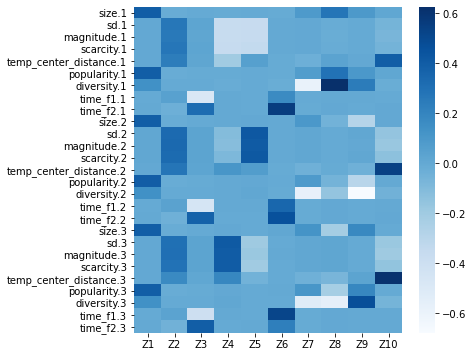

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6,6))

sns.heatmap(np.transpose(c), cmap='Blues',
            xticklabels=["Z"+str(x) for x in range(1,len(c)+1)],
            yticklabels=list(df.columns[:-1]))

Variance explained by Components:

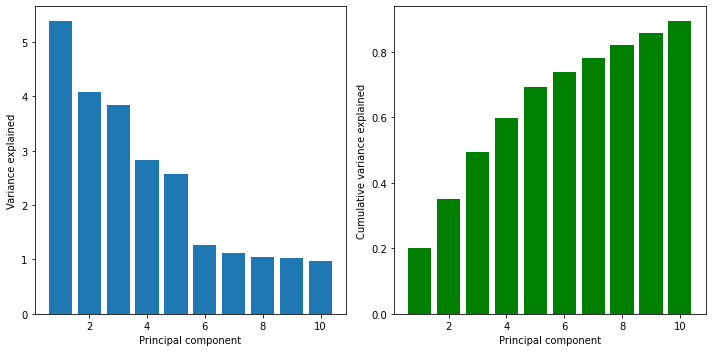

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)
ax[0].bar(range(1,len(v)+1),v)
ax[0].set_ylabel('Variance explained')
ax[1].set_ylabel('Cumulative variance explained')
ax[0].set_xlabel('Principal component')
ax[1].set_xlabel('Principal component')
ax[1].bar(range(1,len(r)+1), np.cumsum(r), color='green')
fig.tight_layout()

Loadings to Components:


In [ ]:
def biplot(z1, z2, sc, comps, obs, features, colors, title):
    x, y = sc[:,z1], sc[:,z2]
    
    fig = plt.figure(figsize=(10,10))
    plt.xlabel("Z{}".format(z1))
    plt.ylabel("Z{}".format(z2))

    sx = (x.max() - x.min())/2
    sy = (y.max() - y.min())/2

    # print X and y label
    y_colors = ['red', 'orange', 'green', 'magenta', 'blue']
    plt.scatter(x, y, c=[y_colors[int(e)] for e in obs])
    # for i in range(len(obs)):
    #     plt.text(x[i], y[i], obs[i], ha='center', fontsize=12)

    vec = np.transpose(comps[[z1,z2], :])
    
    for i in range(len(vec)):
        plt.arrow(0, 0, vec[i,0]*sx, vec[i,1]*sy, ec=colors[i],
                  head_width=0.1, head_length=0.1, fc=colors[i])
        plt.text(vec[i,0]*sx*1.2, vec[i,1]*sy*1.2, features[i], 
                 color = colors[i])

    plt.title(title)
    plt.grid()

In [ ]:
import itertools

feature_colors = plt.cm.rainbow(np.linspace(0, 1, len(df.columns)))
for z1, z2 in itertools.combinations(range(n_components), 2):
    biplot(z1, z2, Xp, c, y, df.columns, colors=feature_colors, title=f"z1={z1} z2={z2}")

In [ ]:
sns.pairplot(df, hue="evolution_label")